<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

# Library for Data Manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

==================== BLOCK 1 Started! ======================


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
data = pd.read_csv(r'MSB-Mortgage-Backed-Securities-Pipeline-main-LoanExport-Revised.csv')

In [3]:
data.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RePayRange
0,16974,25,1,O,89,27,117000,6.750,T,N,...,0,52,1999,2,2029,1,0,High,Excellent,4-8yrs
1,19740,0,1,O,73,17,109000,6.500,R,N,...,0,144,1999,2,2029,1,0,High,Excellent,12-16yrs
2,29940,0,1,O,75,16,88000,6.875,T,N,...,0,67,1999,2,2029,1,0,High,Excellent,4-8yrs
3,31084,0,1,O,76,14,160000,6.875,R,N,...,0,35,1999,2,2029,1,0,High,Excellent,0-4yrs
4,35644,0,1,O,78,18,109000,7.125,R,N,...,0,54,1999,2,2029,1,0,High,Excellent,4-8yrs


In [4]:
data.tail()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RePayRange
291398,37964,0,1,O,60,32,90000,7.000,R,N,...,0,12,1999,3,2029,2,0,High,Excellent,0-4yrs
291399,35644,0,1,O,73,0,267000,6.375,C,N,...,0,53,2002,10,2029,4,0,High,Excellent,4-8yrs
291400,42044,0,1,O,73,31,87000,5.625,R,N,...,0,38,2003,4,2029,4,0,High,Excellent,0-4yrs
291401,37964,0,1,I,80,54,88000,7.000,R,N,...,0,32,1999,4,2029,3,0,High,Excellent,0-4yrs
291402,37964,0,1,O,47,29,70000,7.000,R,N,...,0,29,1999,3,2029,2,0,Medium,Excellent,0-4yrs


In [5]:
# Print the shape of the DataFrame
print("The shape of data frame:", data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(data.columns))

The shape of data frame: (291403, 28)
Number of Rows in the dataframe: 291403
Number of Columns in the dataframe: 28


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">ENCODING</h2>
</div>

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col=['IsFirstTimeHomebuyer','PPM','PropertyState','ServicerName','PropertyType','Channel','SellerName','LTV_Range','CreditRange','RePayRange']
data[cat_col]=data[cat_col].apply(le.fit_transform)
data.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RePayRange
0,16974,25,1,O,89,27,117000,6.750,3,0,...,0,52,1999,2,2029,1,0,0,0,3
1,19740,0,1,O,73,17,109000,6.500,2,0,...,0,144,1999,2,2029,1,0,0,0,1
2,29940,0,1,O,75,16,88000,6.875,3,0,...,0,67,1999,2,2029,1,0,0,0,3
3,31084,0,1,O,76,14,160000,6.875,2,0,...,0,35,1999,2,2029,1,0,0,0,0
4,35644,0,1,O,78,18,109000,7.125,2,0,...,0,54,1999,2,2029,1,0,0,0,3


In [7]:
one_col=['LoanPurpose','Occupancy']
data_one=pd.get_dummies(data[one_col], drop_first=True)
data_one.head()

,LoanPurpose_N,LoanPurpose_P,Occupancy_O,Occupancy_S
0,0,1,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0


In [8]:
data_new=pd.concat([data,data_one], axis = 1)
data_new.drop(['LoanPurpose','Occupancy'],inplace=True,axis=1)
data_new.head()

,MSA,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,...,MaturityYear,MaturityMonth,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RePayRange,LoanPurpose_N,LoanPurpose_P,Occupancy_O,Occupancy_S
0,16974,25,1,89,27,117000,6.750,3,0,15,...,2029,1,0,0,0,3,0,1,1,0
1,19740,0,1,73,17,109000,6.500,2,0,5,...,2029,1,0,0,0,1,1,0,1,0
2,29940,0,1,75,16,88000,6.875,3,0,17,...,2029,1,0,0,0,3,1,0,1,0
3,31084,0,1,76,14,160000,6.875,2,0,4,...,2029,1,0,0,0,0,1,0,1,0
4,35644,0,1,78,18,109000,7.125,2,0,32,...,2029,1,0,0,0,3,1,0,1,0


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">FEATURE ENGINEERING</h2>
</div>

### <span style='color:blue'>1] HIGHLY CORREALATED FEATURES</span> 

<AxesSubplot:>

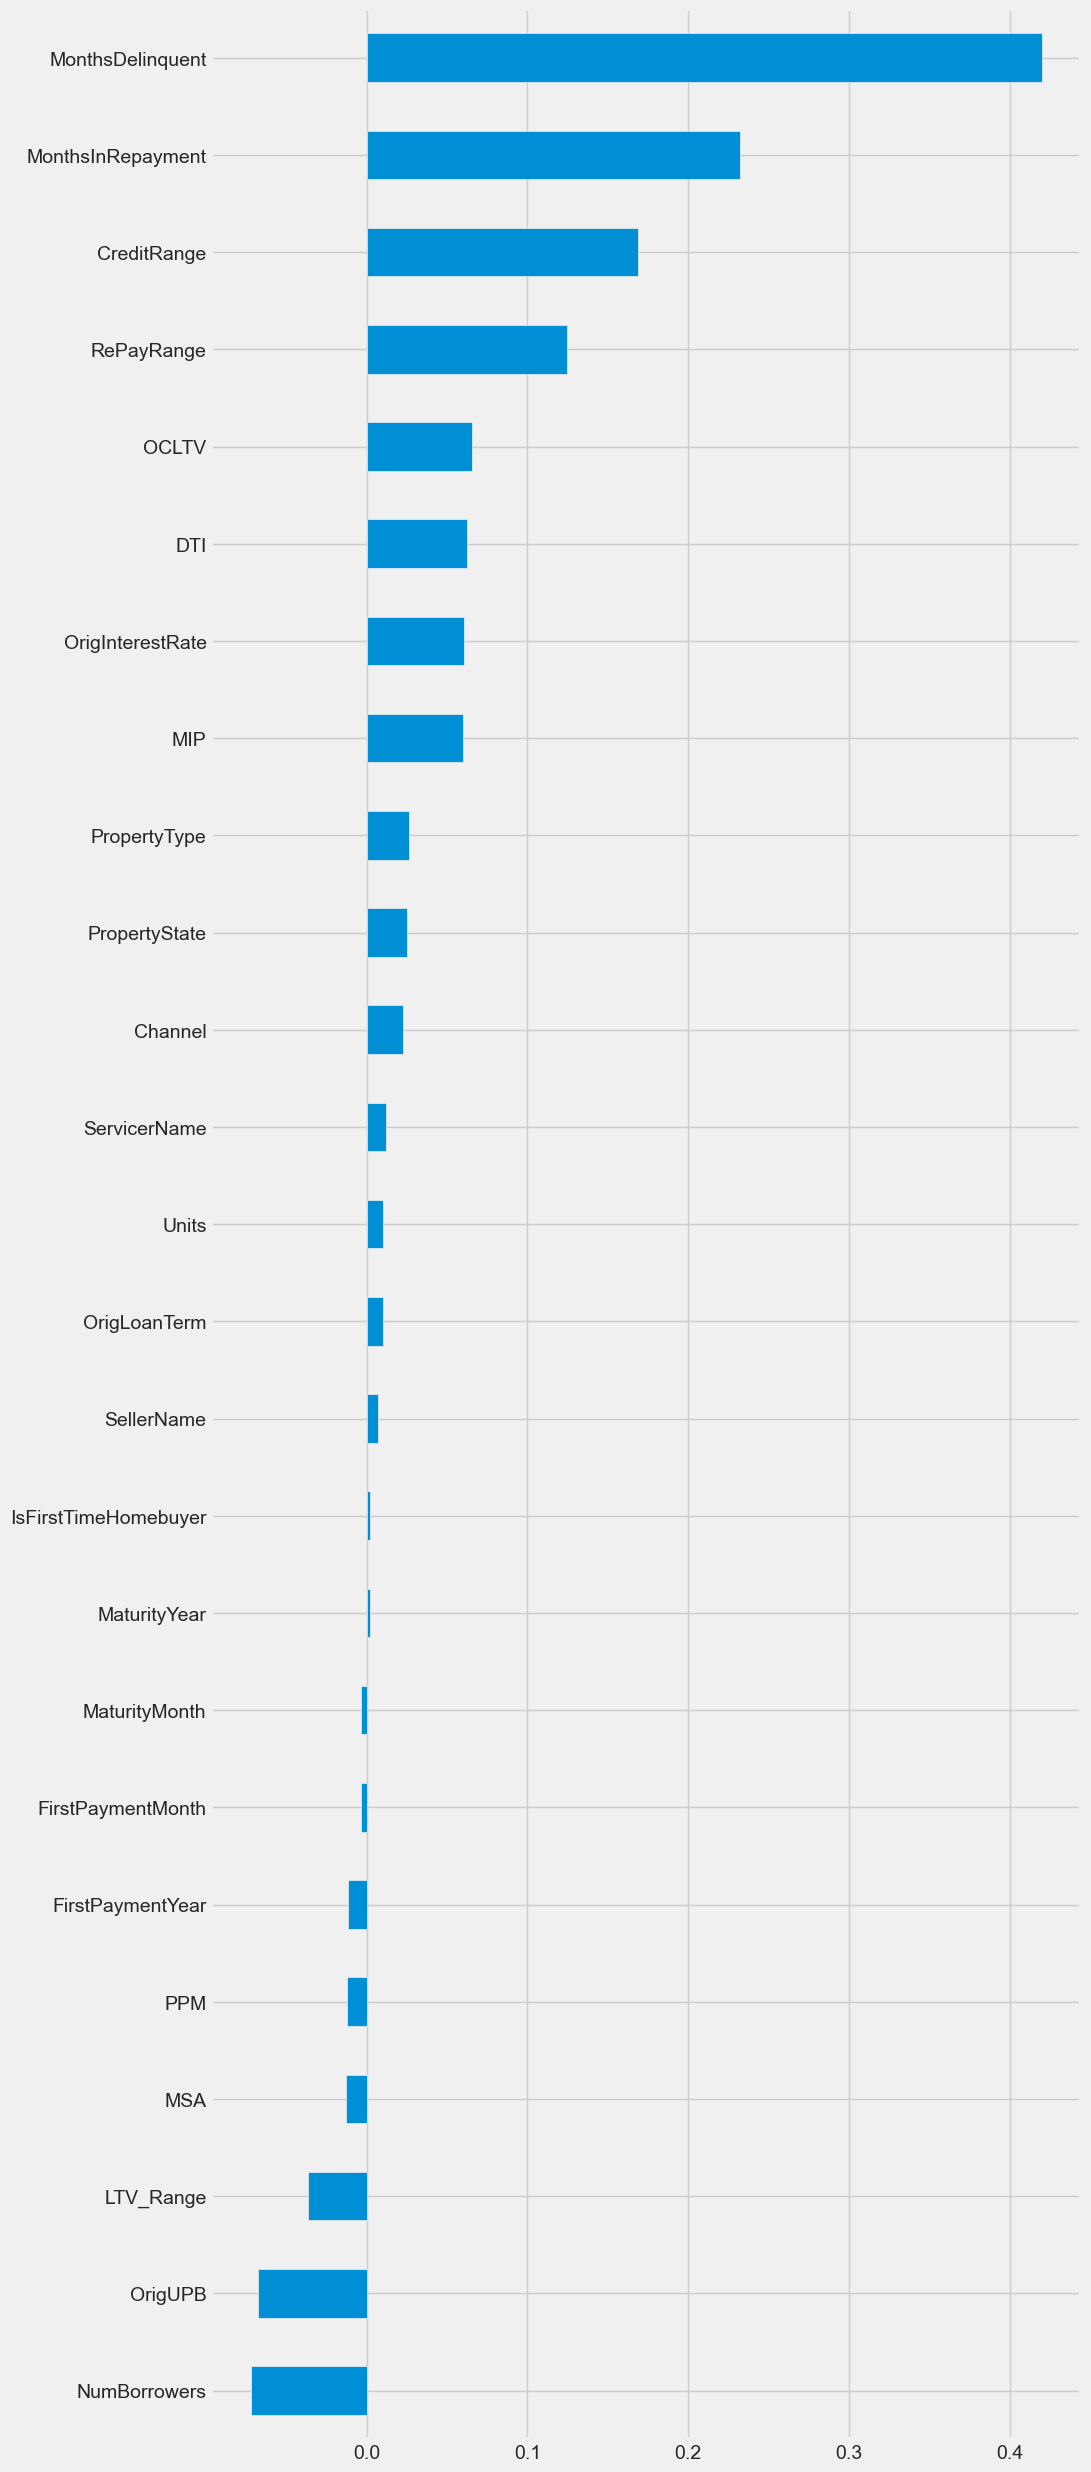

In [9]:
data.drop('EverDelinquent', axis=1).corrwith(data.EverDelinquent).sort_values().plot(kind='barh', figsize=(10, 30))

In [10]:
feature_correlation = data.drop('EverDelinquent', axis=1).corrwith(data.EverDelinquent).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.1].index
print(len(model_col))
print(model_col)

4
Index(['RePayRange', 'CreditRange', 'MonthsInRepayment', 'MonthsDelinquent'], dtype='object')


### <span style='color:blue'>2] TRAIN AND TEST DATASET SPLIT </span> 

In [11]:
x= data_new.drop('EverDelinquent', axis=1)
y = data_new.EverDelinquent

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### <span style='color:blue'>3] MUTUAL INFORMATION SCORE</span> 

In [12]:
# importing library for mi score for classification 
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([4.95620583e-03, 3.37744647e-03, 3.70391979e-02, 4.78245140e-03,
       3.18495546e-03, 2.57523515e-03, 6.13163694e-03, 1.85417861e-02,
       3.09482619e-04, 3.74782035e-03, 3.23722590e-02, 3.70116783e-02,
       2.72771938e-02, 1.05802855e-02, 1.45901060e-02, 4.98020776e-01,
       3.12834912e-02, 2.70625891e-02, 1.13414469e-02, 2.60578973e-02,
       1.19135597e-02, 1.64599568e-03, 8.23756688e-04, 4.21694786e-02,
       3.22849567e-02, 6.88073076e-03, 7.33796445e-03, 3.38148808e-02,
       0.00000000e+00])

In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

MonthsDelinquent        0.498021
CreditRange             0.042169
Units                   0.037039
OrigLoanTerm            0.037012
Occupancy_O             0.033815
PropertyType            0.032372
RePayRange              0.032285
MonthsInRepayment       0.031283
NumBorrowers            0.027277
FirstPaymentYear        0.027063
MaturityYear            0.026058
Channel                 0.018542
ServicerName            0.014590
MaturityMonth           0.011914
FirstPaymentMonth       0.011341
SellerName              0.010580
LoanPurpose_P           0.007338
LoanPurpose_N           0.006881
OrigInterestRate        0.006132
MSA                     0.004956
OCLTV                   0.004782
PropertyState           0.003748
MIP                     0.003377
DTI                     0.003185
OrigUPB                 0.002575
IsFirstTimeHomebuyer    0.001646
LTV_Range               0.000824
PPM                     0.000309
Occupancy_S             0.000000
dtype: float64

<AxesSubplot:>

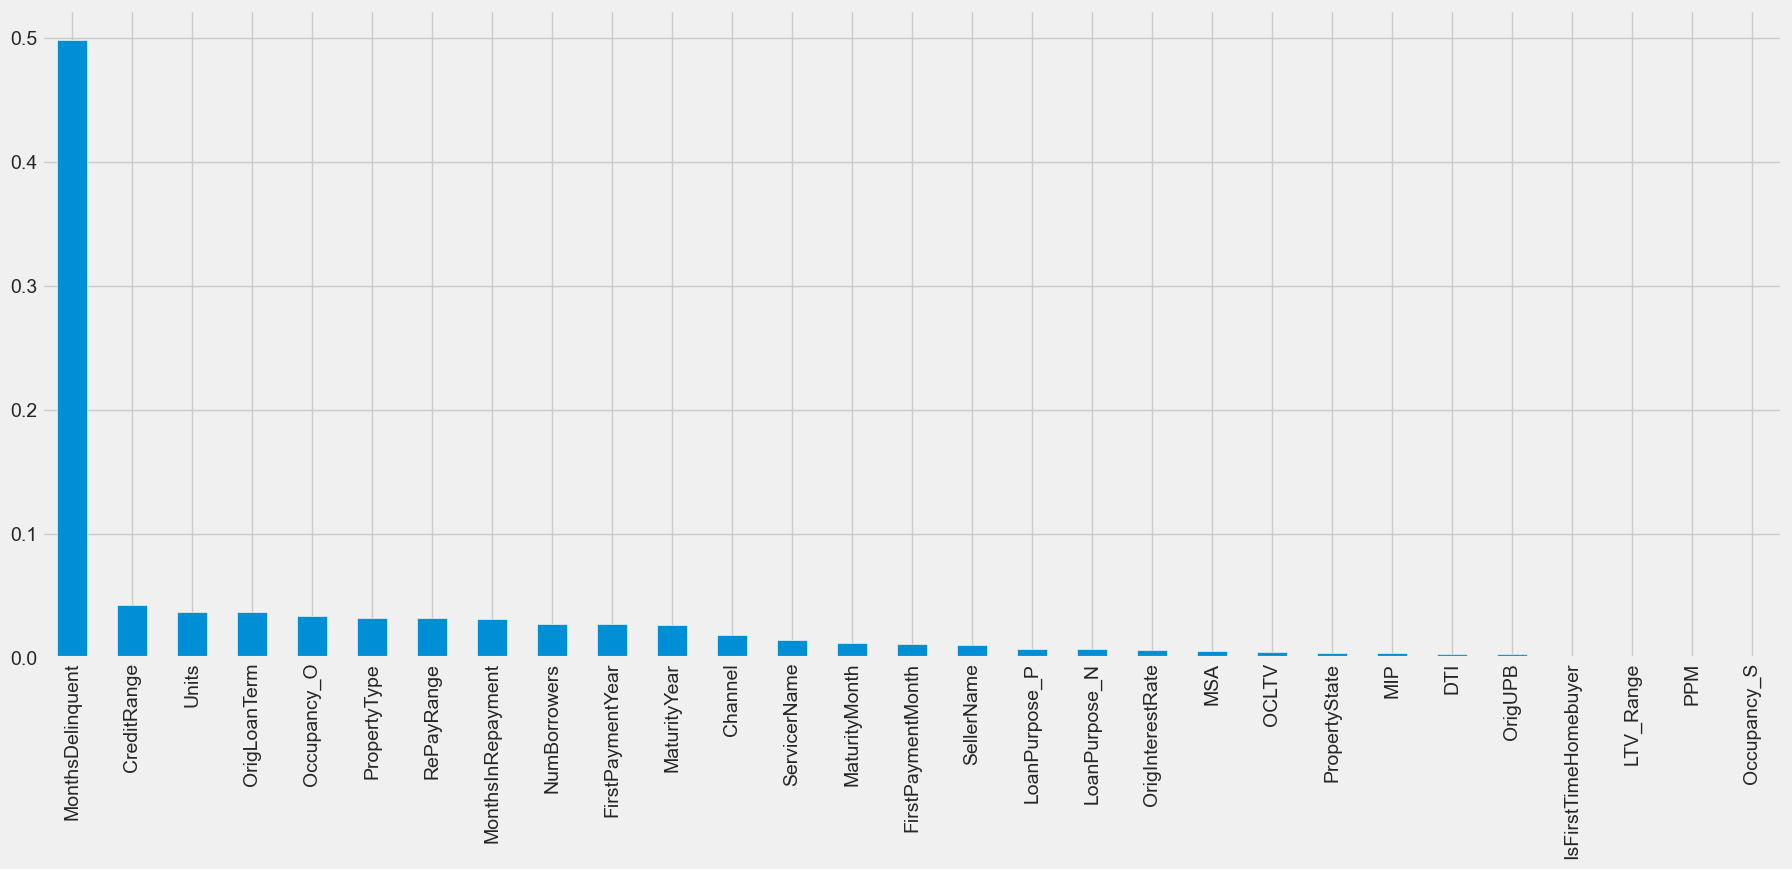

In [14]:
# plot of mi score for features
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [15]:
# For selecting best feature based on mi score
from sklearn.feature_selection import SelectKBest
#Now we Will select the  top 10 important features
selector= SelectKBest(mutual_info_classif, k=10)
x_train_selected=selector.fit_transform(x_train, y_train)
x_test_selected=selector.transform(x_test)

In [16]:
selected_features=x_train.columns[selector.get_support()]
x_beast=pd.DataFrame(x_train_selected,columns=selected_features)
x_beast.head()

,Units,PropertyType,OrigLoanTerm,NumBorrowers,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,CreditRange,RePayRange,Occupancy_O
0,1.0,5.0,360.0,2.0,0.0,49.0,1999.0,2.0,3.0,1.0
1,1.0,0.0,360.0,2.0,0.0,36.0,1999.0,3.0,0.0,1.0
2,1.0,4.0,360.0,2.0,0.0,59.0,1999.0,3.0,3.0,0.0
3,1.0,5.0,360.0,2.0,0.0,149.0,1999.0,0.0,1.0,1.0
4,1.0,5.0,360.0,2.0,0.0,44.0,1999.0,0.0,0.0,1.0


### <span style='color:blue'>4] STANDARD SCALING </span> 

In [17]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### <span style='color:blue'>5] PCA </span> 

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(x_train_scaled)
pca.transform(x_test_scaled)

array([[ 6.89161784e-01, -1.04877743e-01,  1.96944762e+00, ...,
         2.57745563e-03,  7.73974705e-04, -1.14328474e-15],
       [-2.49455959e+00, -1.31883109e+00, -7.83082639e-01, ...,
         1.07174614e+00, -3.28184986e-02, -5.16060174e-16],
       [ 2.75764897e+00, -5.11612205e-01,  2.60166659e-01, ...,
         9.24637998e-02,  7.97830618e-03, -6.20285474e-16],
       ...,
       [ 5.73044058e-01,  9.77585625e-01,  1.22489513e+00, ...,
         1.43233950e-02, -2.36251280e-03,  2.33340726e-16],
       [-2.82880220e+00,  1.92912314e+00,  2.97198637e-01, ...,
         1.46687379e+00, -8.95221918e-04,  2.74419502e-16],
       [ 2.45106372e+00, -1.47257598e+00,  2.01836687e-01, ...,
         1.23771776e-01, -1.53233837e-02, -2.89227630e-16]])

In [19]:
pca.explained_variance_ratio_.shape

(29,)

In [20]:
pca.components_.shape

(29, 29)

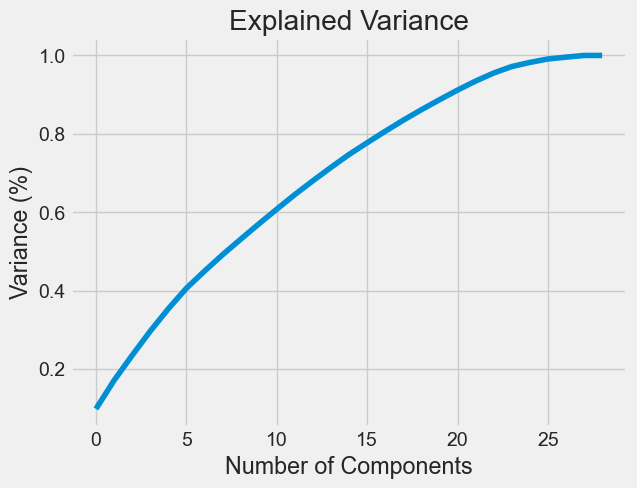

In [21]:
# For choosing number Principal Components I have plotted screen plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [22]:
threshold=0.90
num_components=np.argmax(np.cumsum(pca.explained_variance_ratio_)>=threshold)
num_components

20

In [23]:
pca_final=PCA(n_components=num_components)

x_train_final=pca_final.fit_transform(x_train_scaled)
x_test_final=pca_final.transform(x_test_scaled)

component_names=[f"PC{i+1}" for i in range(x_train_final.shape[1])]
pca_final=pd.DataFrame(x_train_final,columns=component_names)
pca_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.033435,-0.471420,1.210813,-0.008053,0.043500,-1.649166,0.528459,0.077715,1.052173,-1.075280,0.043657,0.371118,-0.944424,-1.039229,0.232615,0.928804,-0.063800,1.493685,0.724606,-0.681868
1,3.843074,-0.037765,-0.997919,-0.399672,0.603404,0.376178,-2.126550,2.155315,0.025123,0.347960,0.965861,-1.583827,-1.359060,0.514816,1.097611,-1.172630,-1.383773,2.064279,1.994387,-0.112765
2,0.150153,1.637372,-3.376825,-0.585271,0.946047,-0.896074,0.394639,0.335155,-1.142493,0.485766,0.072862,-1.455284,-0.594695,0.576631,0.154951,-0.070349,0.186024,2.829768,-0.623868,1.855586
3,-0.550547,-0.390525,-0.871698,0.712779,-0.294934,1.209784,0.534041,-1.218584,-1.716702,0.877627,-0.014179,0.033872,0.283792,-0.203819,0.841650,0.503697,0.675901,-0.211868,0.053645,1.161232
4,1.510999,-1.277070,0.985814,-0.062668,1.274792,0.966727,1.372290,1.005482,0.561491,-0.918615,-0.249626,-0.604454,-0.227900,0.198838,1.447784,0.626913,0.907482,-1.379579,0.397244,0.748058


In [24]:
pca_final.shape

(233122, 20)

In [25]:
data_new.to_csv('MSB-Mortgage-Backed-Securities-Pipeline-main-LoanExport-Revised1.csv',index=False)